<a href="https://colab.research.google.com/github/morad1998/100-Days-Of-ML-Code/blob/master/ScalableComputingUsingPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scalable Computing Using Python**
*Multi-Threading*

*Multi-Processing*

*Message Passing Interface (MPI) - Cluster Computing*

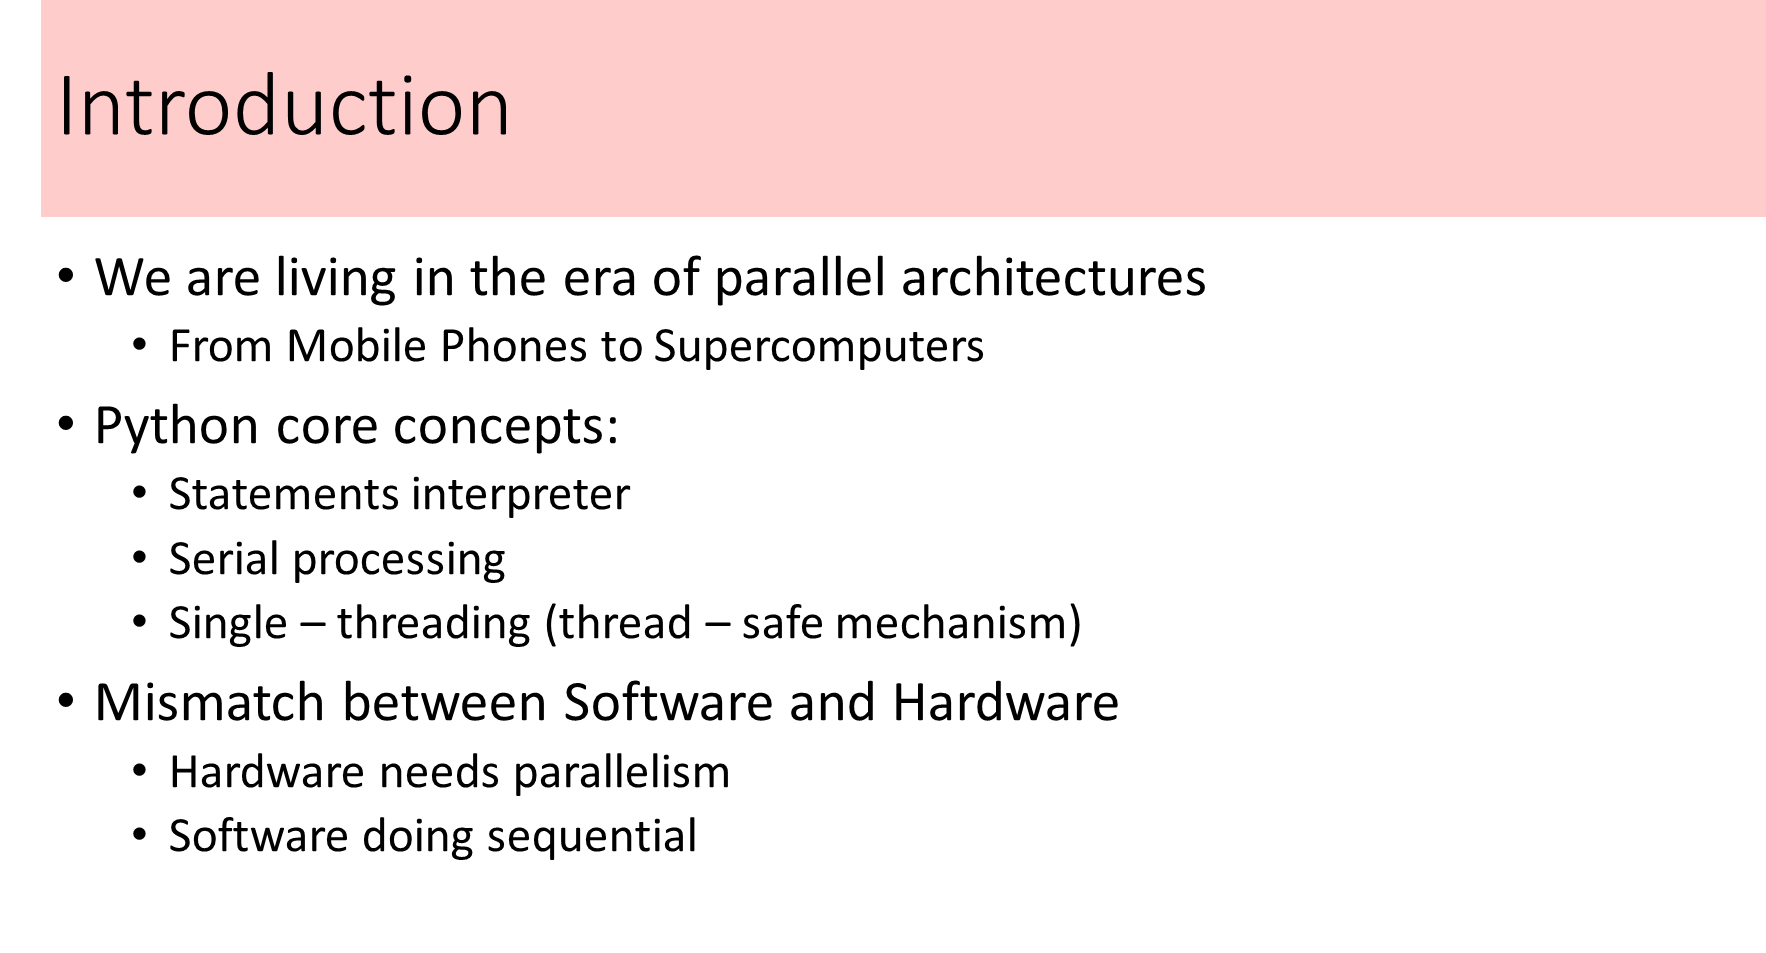

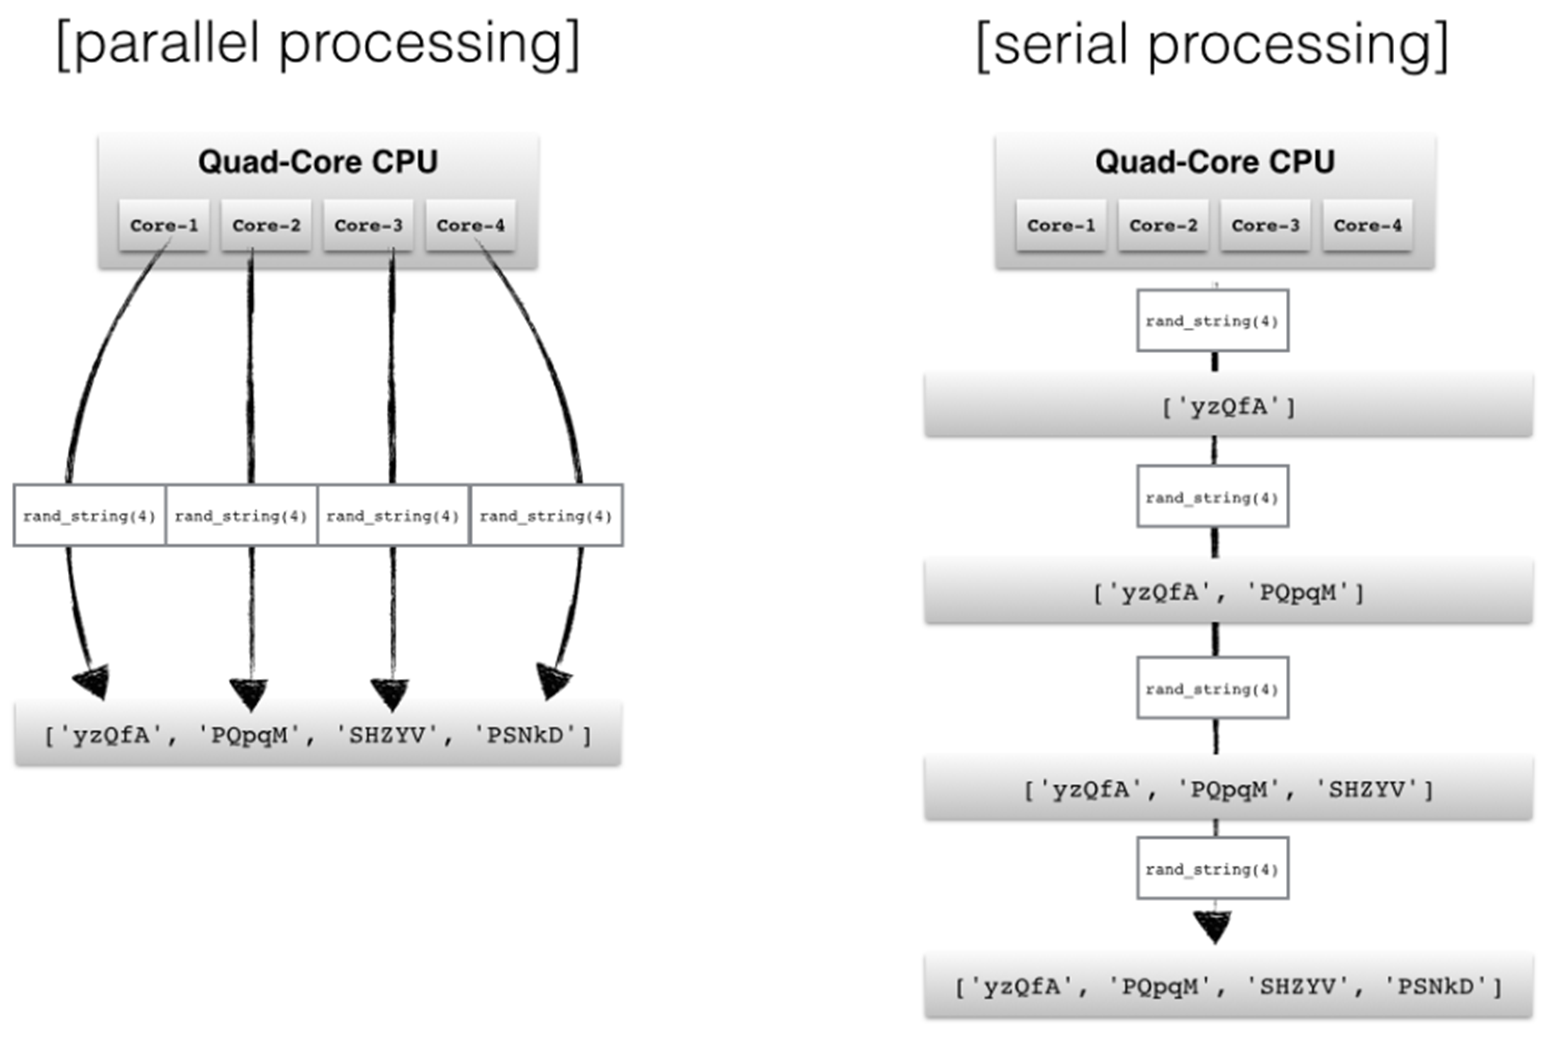

**Multi-Threading vs Multi-Processing**

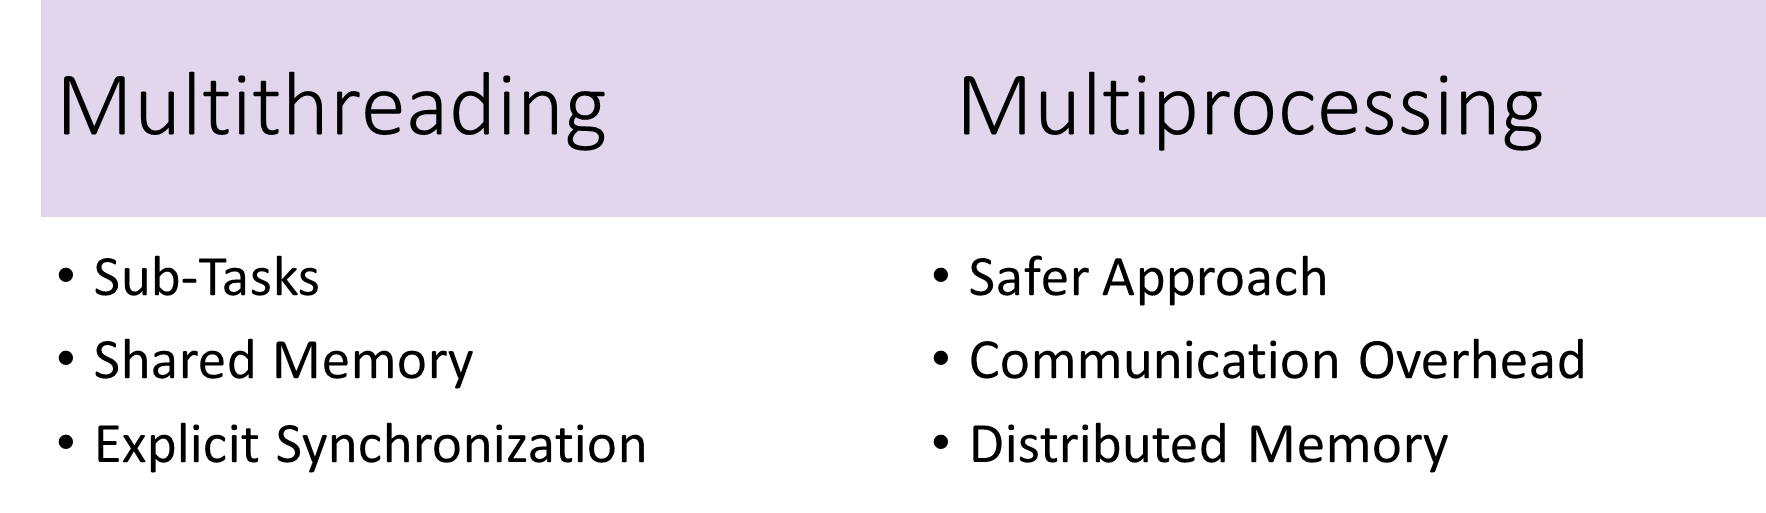

In [ ]:
# only_sleep and crunch_numbers
"""
Created on Mon Oct 22 09:45:22 2018

@author: DR.AYAZ
"""

import os
import time
import threading
import multiprocessing
 
NUM_WORKERS = 4
 
def only_sleep():
    """ Do nothing, wait for a timer to expire """
    print("PID: %s, Process Name: %s, Thread Name: %s" % (
        os.getpid(),
        multiprocessing.current_process().name,
        threading.current_thread().name)
    )
    time.sleep(1)

def crunch_numbers():
    """ Do some computations """
    print("PID: %s, Process Name: %s, Thread Name: %s" % (
        os.getpid(),
        multiprocessing.current_process().name,
        threading.current_thread().name)
    )
    x = 0
    while x < 10000000:
        x += 1

## Run tasks serially
start_time = time.time()
for _ in range(NUM_WORKERS):
    only_sleep()
end_time = time.time()
 
print("Serial time=", end_time - start_time)
 
# Run tasks using threads
start_time = time.time()
threads = [threading.Thread(target=only_sleep) for _ in range(NUM_WORKERS)]
[thread.start() for thread in threads]
[thread.join() for thread in threads]
end_time = time.time()
 
print("Threads time=", end_time - start_time)
 
# Run tasks using processes
start_time = time.time()
processes = [multiprocessing.Process(target=only_sleep) for x in range(NUM_WORKERS)]
for p in processes:
    p.start()
#[process.start() for process in processes]
for p in processes:
    p.join()
#[process.join() for process in processes]
end_time = time.time()
 
print("Parallel time=", end_time - start_time)


PID: 60, Process Name: MainProcess, Thread Name: MainThread
PID: 60, Process Name: MainProcess, Thread Name: MainThread
PID: 60, Process Name: MainProcess, Thread Name: MainThread
PID: 60, Process Name: MainProcess, Thread Name: MainThread
Serial time= 4.005522012710571
PID: 60, Process Name: MainProcess, Thread Name: Thread-11
PID: 60, Process Name: MainProcess, Thread Name: Thread-12PID: 60, Process Name: MainProcess, Thread Name: Thread-13
PID: 60, Process Name: MainProcess, Thread Name: Thread-14

Threads time= 1.0108957290649414
PID: 105, Process Name: Process-1, Thread Name: MainThread
PID: 108, Process Name: Process-2, Thread Name: MainThread
PID: 111, Process Name: Process-3, Thread Name: MainThread
PID: 114, Process Name: Process-4, Thread Name: MainThread
Parallel time= 1.0542218685150146


In [ ]:
#Repeat the Experiment for crunch_numbers


**Multiprocessing Module in Python**

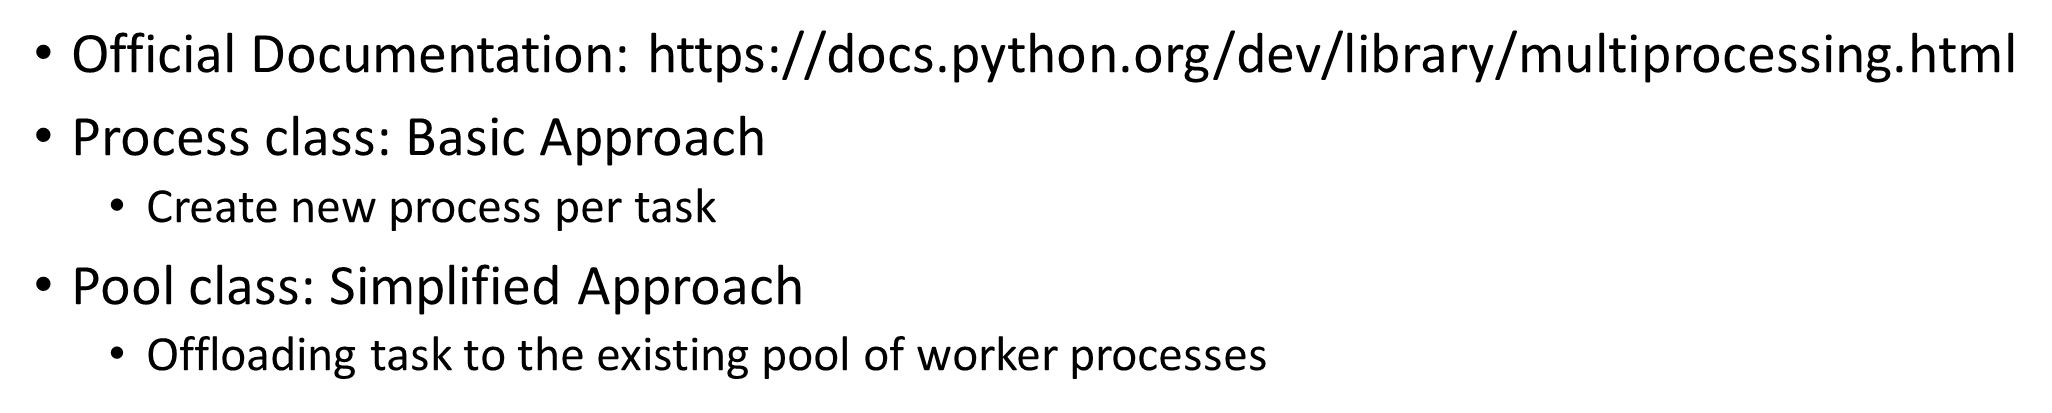

In [ ]:
# Random Strings Example
"""
Created on Mon Oct 22 09:55:16 2018

@author: DR.AYAZ
"""

import multiprocessing as mp
import random
import string
import os

random.seed(123)

# Define an output queue
output = mp.Queue()

# define a example function
def rand_string(length, output):
    """ Generates a random string of numbers, lower- and uppercase chars. """
    rand_str = ''.join(random.choice(
                        string.ascii_lowercase
                        + string.ascii_uppercase
                        + string.digits)
                   for i in range(length))
    output.put(rand_str)
    print(os.getpid())

# Setup a list of processes that we want to run
processes = [mp.Process(target=rand_string, args=(3, output)) for x in range(6)]

# Run processes
for p in processes:
    p.start()

# Exit the completed processes
for p in processes:
    p.join()

# Get process results from the output queue
results = [output.get() for p in processes]

print(results)


576
578
581
588
590
596
['0r5', 'Lca', '460', 'O5b', '4Pg', 's9M']


In [ ]:
# Cube Example
"""
Created on Mon Oct 22 10:04:29 2018

@author: DR.AYAZ
"""

import multiprocessing as mp
import os

def cube(x):
    print(os.getpid())
    return x**3

pool = mp.Pool(processes=4)
results = [pool.apply(cube, args=(x,)) for x in range(1,7)]
print(results)


794
795
796
797
794
795
[1, 8, 27, 64, 125, 216]


# **Practical Applications**

In [ ]:
#Kernel Density Estimation
"""
Created on Fri Nov 16 09:26:20 2018

@author: DR.AYAZ
"""
import numpy as np
import multiprocessing as mp
import time

def parzen_estimation(x_samples, point_x, h):
    k_n = 0
    for row in x_samples:
        x_i = (point_x - row[:,np.newaxis]) / (h)
        for row in x_i:
            if np.abs(row) > (1/2):
                break
        else: # "completion-else"*
            k_n += 1
    return (h, (k_n / len(x_samples)) / (h**point_x.shape[1]))

def serial(samples, x, widths):
    return [parzen_estimation(samples, x, w) for w in widths]

def multiprocess(nproc, samples, x, widths):
    pool = mp.Pool(processes=nproc)
    results = [pool.apply_async(parzen_estimation, args=(samples, x, w)) for w in widths]
    results = [p.get() for p in results]
    results.sort() # to sort the results by input window width
    return results

np.random.seed(123)

# Generate random 2D-patterns
mu_vec = np.array([0,0])
cov_mat = np.array([[1,0],[0,1]])
x_2Dgauss = np.random.multivariate_normal(mu_vec, cov_mat, 10000)
widths = np.arange(0.1, 1.3, 0.1)
point_x = np.array([[0],[0]])

results = []
start_time = time.time()
results = serial(x_2Dgauss, point_x, widths)
end_time = time.time()
print("Serial Time = ", end_time - start_time)

results = []
start_time = time.time()
results = multiprocess(4, x_2Dgauss, point_x, widths)
end_time = time.time()

print("Parallel Time = ", end_time - start_time)

for r in results:
    print('h = %s, p(x) = %s' %(r[0], r[1]))


Serial Time =  0.7576830387115479
Parallel Time =  0.7695631980895996
h = 0.1, p(x) = 0.016
h = 0.2, p(x) = 0.0305
h = 0.30000000000000004, p(x) = 0.04499999999999999
h = 0.4, p(x) = 0.06175
h = 0.5, p(x) = 0.078
h = 0.6, p(x) = 0.09116666666666667
h = 0.7000000000000001, p(x) = 0.106
h = 0.8, p(x) = 0.117375
h = 0.9, p(x) = 0.13266666666666668
h = 1.0, p(x) = 0.1445
h = 1.1, p(x) = 0.1570909090909091
h = 1.2000000000000002, p(x) = 0.16849999999999996


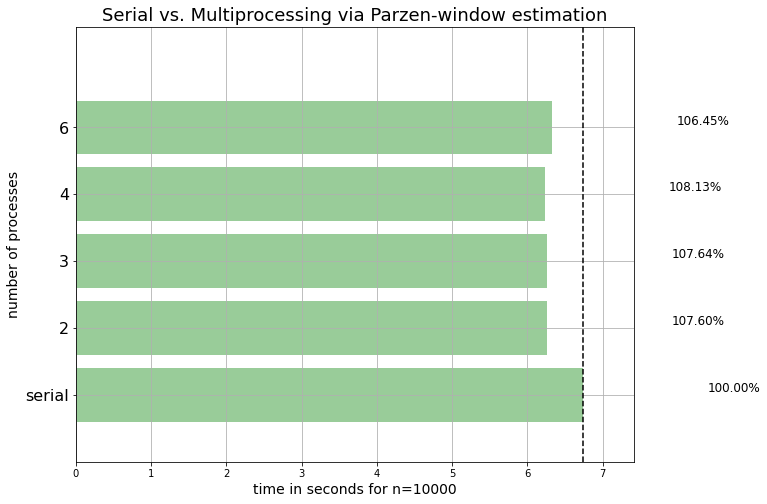


Python version  : 3.7.12
compiler        : GCC 7.5.0

system     : Linux
release    : 5.4.104+
machine    : x86_64
processor  : x86_64
CPU count  : 2
interpreter: 64bit





In [ ]:
# Kernel Density Estimation - Benchmarks
"""
Created on Fri Nov 16 09:26:20 2018

@author: DR.AYAZ
"""
import numpy as np
import multiprocessing as mp
import timeit
import platform
from matplotlib import pyplot as plt

def print_sysinfo():

    print('\nPython version  :', platform.python_version())
    print('compiler        :', platform.python_compiler())

    print('\nsystem     :', platform.system())
    print('release    :', platform.release())
    print('machine    :', platform.machine())
    print('processor  :', platform.processor())
    print('CPU count  :', mp.cpu_count())
    print('interpreter:', platform.architecture()[0])
    print('\n\n')

def parzen_estimation(x_samples, point_x, h):
    k_n = 0
    for row in x_samples:
        x_i = (point_x - row[:,np.newaxis]) / (h)
        for row in x_i:
            if np.abs(row) > (1/2):
                break
        else: # "completion-else"*
            k_n += 1
    return (h, (k_n / len(x_samples)) / (h**point_x.shape[1]))

def serial(samples, x, widths):
    return [parzen_estimation(samples, x, w) for w in widths]

def multiprocess(processes, samples, x, widths):
    pool = mp.Pool(processes=processes)
    results = [pool.apply_async(parzen_estimation, args=(samples, x, w)) for w in widths]
    results = [p.get() for p in results]
    results.sort() # to sort the results by input window width
    return results

def plot_results():
    bar_labels = ['serial', '2', '3', '4', '6']

    fig = plt.figure(figsize=(10,8))

    # plot bars
    y_pos = np.arange(len(benchmarks))
    plt.yticks(y_pos, bar_labels, fontsize=16)
    bars = plt.barh(y_pos, benchmarks,
             align='center', alpha=0.4, color='g')

    # annotation and labels

    for ba,be in zip(bars, benchmarks):
        plt.text(ba.get_width() + 2, ba.get_y() + ba.get_height()/2,
                '{0:.2%}'.format(benchmarks[0]/be),
                ha='center', va='bottom', fontsize=12)

    plt.xlabel('time in seconds for n=%s' %n, fontsize=14)
    plt.ylabel('number of processes', fontsize=14)
    t = plt.title('Serial vs. Multiprocessing via Parzen-window estimation', fontsize=18)
    plt.ylim([-1,len(benchmarks)+0.5])
    plt.xlim([0,max(benchmarks)*1.1])
    plt.vlines(benchmarks[0], -1, len(benchmarks)+0.5, linestyles='dashed')
    plt.grid()

    plt.show()

np.random.seed(123)

widths = np.linspace(1.0, 1.2, 100)
mu_vec = np.array([0,0])
cov_mat = np.array([[1,0],[0,1]])
n = 10000

x_2Dgauss = np.random.multivariate_normal(mu_vec, cov_mat, n)

benchmarks = []

benchmarks.append(timeit.Timer('serial(x_2Dgauss, point_x, widths)',
            'from __main__ import serial, x_2Dgauss, point_x, widths').timeit(number=1))

benchmarks.append(timeit.Timer('multiprocess(2, x_2Dgauss, point_x, widths)',
            'from __main__ import multiprocess, x_2Dgauss, point_x, widths').timeit(number=1))

benchmarks.append(timeit.Timer('multiprocess(3, x_2Dgauss, point_x, widths)',
            'from __main__ import multiprocess, x_2Dgauss, point_x, widths').timeit(number=1))

benchmarks.append(timeit.Timer('multiprocess(4, x_2Dgauss, point_x, widths)',
            'from __main__ import multiprocess, x_2Dgauss, point_x, widths').timeit(number=1))

benchmarks.append(timeit.Timer('multiprocess(6, x_2Dgauss, point_x, widths)',
            'from __main__ import multiprocess, x_2Dgauss, point_x, widths').timeit(number=1))

plot_results()
print_sysinfo()


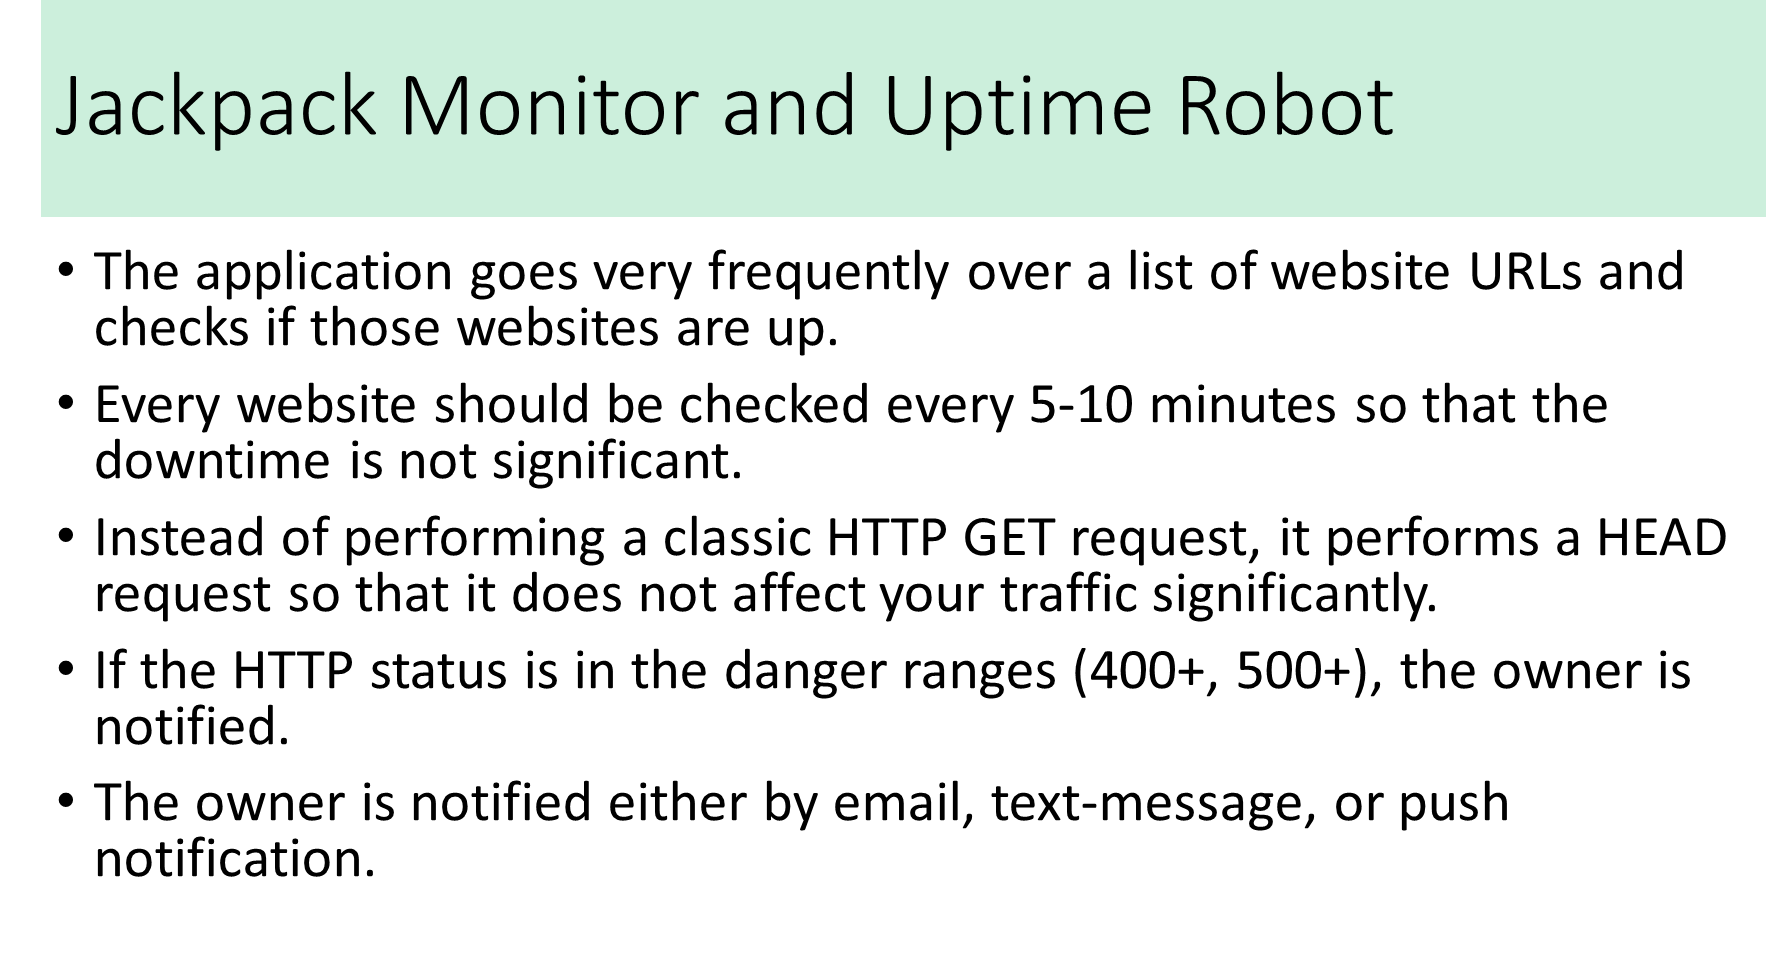

In [ ]:
# Checking Uptime for Websites - Sequential
"""
Created on Fri Nov 16 09:36:09 2018

@author: DR.AYAZ
"""

import time
import logging
import requests
 
 
class WebsiteDownException(Exception):
    pass
 
 
def ping_website(address, timeout=20):
    """
    Check if a website is down. A website is considered down 
    if either the status_code >= 400 or if the timeout expires
     
    Throw a WebsiteDownException if any of the website down conditions are met
    """
    try:
        response = requests.head(address, timeout=timeout)
        if response.status_code >= 400:
            logging.warning("Website %s returned status_code=%s" % (address, response.status_code))
            raise WebsiteDownException()
    except requests.exceptions.RequestException:
        logging.warning("Timeout expired for website %s" % address)
        raise WebsiteDownException()
         
 
def notify_owner(address):
    """ 
    Send the owner of the address a notification that their website is down 
     
    For now, we're just going to sleep for 0.5 seconds but this is where 
    you would send an email, push notification or text-message
    """
    logging.info("Notifying the owner of %s website" % address)
    time.sleep(0.5)
     
 
def check_website(address):
    """
    Utility function: check if a website is down, if so, notify the user
    """
    try:
        ping_website(address)
    except WebsiteDownException:
        notify_owner(address)

WEBSITE_LIST = [
    'http://envato.com',
    'http://amazon.co.uk',
    'http://amazon.com',
    'http://facebook.com',
    'http://google.com',
    'http://google.fr',
    'http://google.es',
    'http://google.co.uk',
    'http://internet.org',
    'http://gmail.com',
    'http://stackoverflow.com',
    'http://github.com',
    'http://heroku.com',
    'http://really-cool-available-domain.com',
    'http://djangoproject.com',
    'http://rubyonrails.org',
    'http://basecamp.com',
    'http://trello.com',
    'http://yiiframework.com',
    'http://shopify.com',
    'http://another-really-interesting-domain.co',
    'http://airbnb.com',
    'http://instagram.com',
    'http://snapchat.com',
    'http://youtube.com',
    'http://baidu.com',
    'http://yahoo.com',
    'http://live.com',
    'http://linkedin.com',
    'http://yandex.ru',
    'http://netflix.com',
    'http://wordpress.com',
    'http://bing.com'
]

start_time = time.time()
 
for address in WEBSITE_LIST:
    check_website(address)
         
end_time = time.time()        
 
print("Time for SerialSquirrel: %ssecs" % (end_time - start_time))
 
# WARNING:root:Timeout expired for website http://really-cool-available-domain.com
# WARNING:root:Timeout expired for website http://another-really-interesting-domain.co
# WARNING:root:Website http://bing.com returned status_code=405
# Time for SerialSquirrel: 15.881232261657715secs


In [ ]:
# Checking Uptime for Websites - Multi Processing
"""
Created on Fri Nov 16 09:36:09 2018

@author: DR.AYAZ
"""

import time
import logging
import requests
import socket
import multiprocessing
 
class WebsiteDownException(Exception):
    pass
 
 
def ping_website(address, timeout=20):
    """
    Check if a website is down. A website is considered down 
    if either the status_code >= 400 or if the timeout expires
     
    Throw a WebsiteDownException if any of the website down conditions are met
    """
    try:
        response = requests.head(address, timeout=timeout)
        if response.status_code >= 400:
            logging.warning("Website %s returned status_code=%s" % (address, response.status_code))
            raise WebsiteDownException()
    except requests.exceptions.RequestException:
        logging.warning("Timeout expired for website %s" % address)
        raise WebsiteDownException()
         
 
def notify_owner(address):
    """ 
    Send the owner of the address a notification that their website is down 
     
    For now, we're just going to sleep for 0.5 seconds but this is where 
    you would send an email, push notification or text-message
    """
    logging.info("Notifying the owner of %s website" % address)
    time.sleep(0.5)
     
 
def check_website(address):
    """
    Utility function: check if a website is down, if so, notify the user
    """
    try:
        ping_website(address)
    except WebsiteDownException:
        notify_owner(address)

WEBSITE_LIST = [
    'http://envato.com',
    'http://amazon.co.uk',
    'http://amazon.com',
    'http://facebook.com',
    'http://google.com',
    'http://google.fr',
    'http://google.es',
    'http://google.co.uk',
    'http://internet.org',
    'http://gmail.com',
    'http://stackoverflow.com',
    'http://github.com',
    'http://heroku.com',
    'http://really-cool-available-domain.com',
    'http://djangoproject.com',
    'http://rubyonrails.org',
    'http://basecamp.com',
    'http://trello.com',
    'http://yiiframework.com',
    'http://shopify.com',
    'http://another-really-interesting-domain.co',
    'http://airbnb.com',
    'http://instagram.com',
    'http://snapchat.com',
    'http://youtube.com',
    'http://baidu.com',
    'http://yahoo.com',
    'http://live.com',
    'http://linkedin.com',
    'http://yandex.ru',
    'http://netflix.com',
    'http://wordpress.com',
    'http://bing.com'
]

NUM_WORKERS = 4
 
start_time = time.time()
 
with multiprocessing.Pool(processes=NUM_WORKERS) as pool:
    results = pool.map_async(check_website, WEBSITE_LIST)
    results.wait()
 
end_time = time.time()        
 
print("Time for MultiProcessingSquirrel: %ssecs" % (end_time - start_time))
 
# WARNING:root:Timeout expired for website http://really-cool-available-domain.com
# WARNING:root:Timeout expired for website http://another-really-interesting-domain.co
# WARNING:root:Website http://bing.com returned status_code=405
# Time for MultiProcessingSquirrel: 2.8224599361419678secs


In [ ]:
# Checking Uptime for Websites - Multi Threading
"""
Created on Fri Nov 16 09:36:09 2018

@author: DR.AYAZ
"""

import time
import logging
import requests
from queue import Queue
from threading import Thread 
import concurrent.futures
 
class WebsiteDownException(Exception):
    pass
 
 
def ping_website(address, timeout=20):
    """
    Check if a website is down. A website is considered down 
    if either the status_code >= 400 or if the timeout expires
     
    Throw a WebsiteDownException if any of the website down conditions are met
    """
    try:
        response = requests.head(address, timeout=timeout)
        if response.status_code >= 400:
            logging.warning("Website %s returned status_code=%s" % (address, response.status_code))
            raise WebsiteDownException()
    except requests.exceptions.RequestException:
        logging.warning("Timeout expired for website %s" % address)
        raise WebsiteDownException()
         
 
def notify_owner(address):
    """ 
    Send the owner of the address a notification that their website is down 
     
    For now, we're just going to sleep for 0.5 seconds but this is where 
    you would send an email, push notification or text-message
    """
    logging.info("Notifying the owner of %s website" % address)
    time.sleep(0.5)
     
 
def check_website(address):
    """
    Utility function: check if a website is down, if so, notify the user
    """
    try:
        ping_website(address)
    except WebsiteDownException:
        notify_owner(address)

WEBSITE_LIST = [
    'http://envato.com',
    'http://amazon.co.uk',
    'http://amazon.com',
    'http://facebook.com',
    'http://google.com',
    'http://google.fr',
    'http://google.es',
    'http://google.co.uk',
    'http://internet.org',
    'http://gmail.com',
    'http://stackoverflow.com',
    'http://github.com',
    'http://heroku.com',
    'http://really-cool-available-domain.com',
    'http://djangoproject.com',
    'http://rubyonrails.org',
    'http://basecamp.com',
    'http://trello.com',
    'http://yiiframework.com',
    'http://shopify.com',
    'http://another-really-interesting-domain.co',
    'http://airbnb.com',
    'http://instagram.com',
    'http://snapchat.com',
    'http://youtube.com',
    'http://baidu.com',
    'http://yahoo.com',
    'http://live.com',
    'http://linkedin.com',
    'http://yandex.ru',
    'http://netflix.com',
    'http://wordpress.com',
    'http://bing.com'
]

NUM_WORKERS = 4
task_queue = Queue()
 
def worker():
    # Constantly check the queue for addresses
    while True:
        address = task_queue.get()
        check_website(address)
         
        # Mark the processed task as done
        task_queue.task_done()
 
start_time = time.time()
         
# Create the worker threads
threads = [Thread(target=worker) for _ in range(NUM_WORKERS)]
 
# Add the websites to the task queue
[task_queue.put(item) for item in WEBSITE_LIST]
 
# Start all the workers
[thread.start() for thread in threads]
 
# Wait for all the tasks in the queue to be processed
task_queue.join()
 
         
end_time = time.time()        
 
print("Time for ThreadedSquirrel: %ssecs" % (end_time - start_time))
 
# WARNING:root:Timeout expired for website http://really-cool-available-domain.com
# WARNING:root:Timeout expired for website http://another-really-interesting-domain.co
# WARNING:root:Website http://bing.com returned status_code=405
# Time for ThreadedSquirrel: 3.110753059387207secs

NUM_WORKERS = 4
 
start_time = time.time()
 
with concurrent.futures.ThreadPoolExecutor(max_workers=NUM_WORKERS) as executor:
    futures = {executor.submit(check_website, address) for address in WEBSITE_LIST}
    concurrent.futures.wait(futures)
 
end_time = time.time()        
 
print("Time for FutureSquirrel: %ssecs" % (end_time - start_time))
 
# WARNING:root:Timeout expired for website http://really-cool-available-domain.com
# WARNING:root:Timeout expired for website http://another-really-interesting-domain.co
# WARNING:root:Website http://bing.com returned status_code=405
# Time for FutureSquirrel: 1.812899112701416secs


# **Python MPI**

In [ ]:
!pip install mpi4py

     |████████████████████████████████| 2.5 MB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.3-cp37-cp37m-linux_x86_64.whl size=2185319 sha256=f414154ad8fffb7b45cbb3b8ae73fee944de886686efeb2f1a38e649c73ffc2b
  Stored in directory: /root/.cache/pip/wheels/7a/07/14/6a0c63fa2c6e473c6edc40985b7d89f05c61ff25ee7f0ad9ac
Successfully built mpi4py


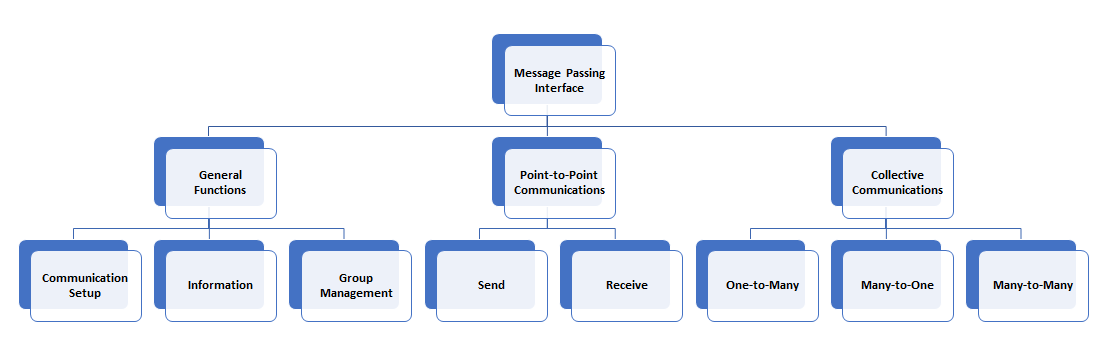

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 16 20:12:23 2018

@author: DR.AYAZ
"""

from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
print('My rank is ',rank)


In [ ]:
!mpiexec --allow-run-as-root -np 4 python mpi.py

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 16 20:15:19 2018

@author: DR.AYAZ
"""

from mpi4py import MPI
import numpy

comm = MPI.COMM_WORLD
rank = comm.Get_rank()

if rank == 0:
    data = {'a': 7, 'b': 3.14}
    comm.send(data, dest=1)
elif rank == 1:
    data = comm.recv(source=0)
    print('On process 1, data is ',data)


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 16 20:16:00 2018

@author: DR.AYAZ
"""

from mpi4py import MPI
import numpy

comm = MPI.COMM_WORLD
rank = comm.Get_rank()

if rank == 0:
    idata = 1
    comm.send(idata, dest=1)
elif rank == 1:
    idata = comm.recv(source=0)
    print('On process 1, data is ',idata)


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 16 20:16:36 2018

@author: DR.AYAZ
"""

from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
rank = comm.Get_rank()

if rank == 0:
    # in real code, this section might
    # read in data parameters from a file
    numData = 10  
    comm.send(numData, dest=1)

    data = np.linspace(0.0,3.14,numData)  
    comm.Send(data, dest=1)

elif rank == 1:

    numData = comm.recv(source=0)
    print('Number of data to receive: ',numData)

    data = np.empty(numData, dtype='d')  # allocate space to receive the array
    comm.Recv(data, source=0)

    print('data received: ',data)


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 16 20:17:01 2018

@author: DR.AYAZ
"""

from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()

if rank == 0:
    data = {'key1' : [1,2, 3],
            'key2' : ( 'abc', 'xyz')}
else:
    data = None

data = comm.bcast(data, root=0)
print('Rank: ',rank,', data: ' ,data)


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 16 20:17:29 2018

@author: DR.AYAZ
"""

from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
rank = comm.Get_rank()

if rank == 0:
    # create a data array on process 0
    # in real code, this section might
    # read in data parameters from a file
    numData = 10  
    data = np.linspace(0.0,3.14,numData)  
else:
    numData = None

# broadcast numData and allocate array on other ranks:
numData = comm.bcast(numData, root=0)
if rank != 0:    
    data = np.empty(numData, dtype='d')  

comm.Bcast(data, root=0) # broadcast the array from rank 0 to all others

print('Rank: ',rank, ', data received: ',data)


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 16 20:18:22 2018

@author: DR.AYAZ
"""

from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
size = comm.Get_size() # new: gives number of ranks in comm
rank = comm.Get_rank()

numDataPerRank = 10  
data = None
if rank == 0:
    data = np.linspace(1,size*numDataPerRank,numDataPerRank*size)
    # when size=4 (using -n 4), data = [1.0:40.0]

recvbuf = np.empty(numDataPerRank, dtype='d') # allocate space for recvbuf
comm.Scatter(data, recvbuf, root=0)

print('Rank: ',rank, ', recvbuf received: ',recvbuf)


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 16 20:18:47 2018

@author: DR.AYAZ
"""

from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()   

numDataPerRank = 10  
sendbuf = np.linspace(rank*numDataPerRank+1,(rank+1)*numDataPerRank,numDataPerRank)
print('Rank: ',rank, ', sendbuf: ',sendbuf)

recvbuf = None
if rank == 0:
    recvbuf = np.empty(numDataPerRank*size, dtype='d')  

comm.Gather(sendbuf, recvbuf, root=0)

if rank == 0:
    print('Rank: ',rank, ', recvbuf received: ',recvbuf)


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 16 20:19:10 2018

@author: DR.AYAZ
"""

from mpi4py import MPI
import numpy as np

comm = MPI.COMM_WORLD
rank = comm.Get_rank()

# Create some np arrays on each process:
# For this demo, the arrays have only one
# entry that is assigned to be the rank of the processor
value = np.array(rank,'d')

print(' Rank: ',rank, ' value = ', value)

# initialize the np arrays that will store the results:
value_sum      = np.array(0.0,'d')
value_max      = np.array(0.0,'d')

# perform the reductions:
comm.Reduce(value, value_sum, op=MPI.SUM, root=0)
comm.Reduce(value, value_max, op=MPI.MAX, root=0)

if rank == 0:
    print(' Rank 0: value_sum =    ',value_sum)
    print(' Rank 0: value_max =    ',value_max)


# **BONUS: MPI implementation for one of the above applications**

*Kernel Density Estimation*

**OR**

*Checking Uptime for Websites*

In [ ]:
# What MPI functions you need to implement it?
# Data partition scheme?
# Results collection?
